In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import nltk

In [2]:
# read in data - here I took the same categories as we had in the lesson
categories = ['soc.religion.christian', 'comp.graphics', 'sci.med', 'comp.windows.x', 'sci.space', 'alt.atheism']
newsgroup_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True)
newsgroup_test = fetch_20newsgroups(subset='test', categories=categories)

In [3]:
stop_words = set(stopwords.words('english')) 
print(stop_words)

{'has', "didn't", 'herself', 'their', 'into', 'hasn', 'own', 'the', "wouldn't", 'did', 'what', 'against', 'before', "don't", 'ma', 'yours', "needn't", 'and', 'under', 'which', 'than', 'won', 'this', 'do', 'we', 'me', 'who', 'out', 'it', 'is', 'there', 're', 'didn', 'or', 'aren', 'be', "isn't", "you'd", 'll', 'only', 'she', 'by', 'no', 'don', 'if', 'because', 'between', 'so', 'doing', 'his', 'yourself', 'will', 'these', 'been', 'whom', 'd', 'where', 'myself', 'theirs', 'hers', 'he', "couldn't", 'during', 'after', 'its', 'an', 'them', 'when', 'her', 'at', 'your', 'why', 'that', "doesn't", 'those', 'while', 'over', 'until', 'just', 'shouldn', "weren't", 'yourselves', "she's", 'does', 'nor', 'a', 'how', 'should', 'to', 'again', 'some', 'couldn', 'shan', 'doesn', 'being', "hasn't", 'below', 'above', 'more', 'such', 'you', 'y', 'haven', 'from', 'm', 'too', "should've", 'both', "shan't", "shouldn't", 'few', 'were', 'most', "aren't", 'ain', 'off', 'wouldn', "won't", 'about', 'am', 'each', 'wer

In [4]:
stop_words.update(['find','would','be','one','say','made','think','subject','see','fnal','articl','feel','given','led',
                  'view','way','either','however','yet'])

In [5]:
# get rid of stop words e.g. with nltk
ps = PorterStemmer()
tokenizer = RegexpTokenizer(r'\w+')

newsgroup_trainN = []
i = 0
for message in newsgroup_train.data:
    text_token = tokenizer.tokenize(message)
    messageN = ''
    for word in text_token:
        word = word.lower()
        if word not in stop_words:
            messageN = messageN + ' ' + ps.stem(word)
    newsgroup_trainN.append(messageN)
newsgroup_train.data = newsgroup_trainN

In [6]:
newsgroup_train.data[0]

' rexlex gov athiest hell organ ad net line 157 articl may 6 00 35 31 1993 15453 geneva rutger edu sun075 gerri palo uunet uu net gerri palo write adam eve golgotha whole process fall man occur involv gradual dim conscious spiritu world precis point theolog bent live immedi flood noah ham son cush son nimrod much stronger appreci divin wrath also stronger understand true god fact immediaci caus hardship much atla seen heaven rest shoulder mere physic heaven lift put god strict spiritu law distanc thu becam elev heaven god men abl heaven afar god heaven could dark cloud regard displeasur breaker law interest titl emancip deliver phoroneu nimrod invad patriarch system abridg liberti mankind worship mani benefit deliver right christ deliver deliv consciou feel god wrath actual perform deliveri god wrath us accept true question happen human be die christ ever present christian readi consign adam abraham even cain etern damnat problem time adam look forward come anoint put faith fact god pr

In [7]:
# tokenize words
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(newsgroup_train.data)

# get size of vocabulary 
# 1 needs to be added because of resrver 0 index
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

X_train = tokenizer.texts_to_sequences(newsgroup_train.data)
X_test = tokenizer.texts_to_sequences(newsgroup_test.data)

37279


In [8]:
# padding
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [10]:
# Using a word embedding layer

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           1863950   
_________________________________________________________________
flatten_1 (Flatten)          (None, 5000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                50010     
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 66        
Total params: 1,914,026
Trainable params: 1,914,026
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(X_train, newsgroup_train.target,
                    epochs=20,
                    verbose=True,
                    validation_data=(X_test, newsgroup_test.target),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, newsgroup_train.target, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, newsgroup_test.target, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Train on 3443 samples, validate on 2291 samples
Epoch 1/20
3443/3443 [==============================] - 16s 5ms/sample - loss: 1.2850 - accuracy: 0.4990 - val_loss: 0.9383 - val_accuracy: 0.6281
Epoch 2/20
3443/3443 [==============================] - 15s 4ms/sample - loss: 0.3420 - accuracy: 0.8960 - val_loss: 0.7464 - val_accuracy: 0.7294
Epoch 3/20
3443/3443 [==============================] - 15s 4ms/sample - loss: 0.1181 - accuracy: 0.9712 - val_loss: 0.7865 - val_accuracy: 0.7237
Epoch 4/20
3443/3443 [==============================] - 16s 5ms/sample - loss: 0.0468 - accuracy: 0.9936 - val_loss: 0.7544 - val_accuracy: 0.7451
Epoch 5/20
3443/3443 [==============================] - 15s 4ms/sample - loss: 0.0204 - accuracy: 0.9991 - val_loss: 0.7951 - val_accuracy: 0.7490
Epoch 6/20
3443/3443 [==============================] - 16s 5ms/sample - loss: 0.0105 - accuracy: 0.9997 - val_loss: 0.8341 - val_accuracy: 0.7433
Epoch 7/20
3443/3443 [==============================] - 15s 4ms/sample

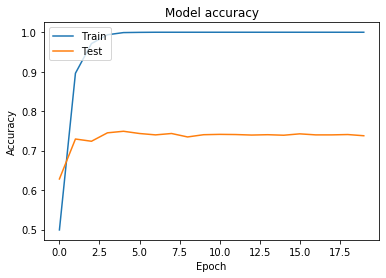

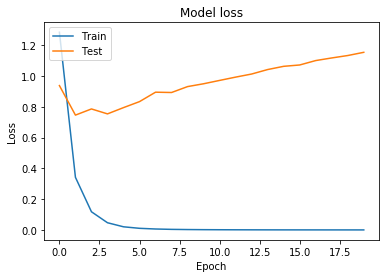

In [12]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [13]:
# nother way to work with embeddings is by using a MaxPooling1D/AveragePooling1D
# or a GlobalMaxPooling1D/GlobalAveragePooling1D layer after the embedding.
# You can think of the pooling layers as a way to downsample (a way to reduce the size of)
# the incoming feature vectors

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 50)           1863950   
_________________________________________________________________
global_max_pooling1d (Global (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 66        
Total params: 1,864,526
Trainable params: 1,864,526
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(X_train, newsgroup_train.target,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, newsgroup_test.target),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, newsgroup_train.target, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, newsgroup_test.target, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Train on 3443 samples, validate on 2291 samples
Epoch 1/10
3443/3443 [==============================] - 16s 5ms/sample - loss: 1.6382 - accuracy: 0.3645 - val_loss: 1.4403 - val_accuracy: 0.4919
Epoch 2/10
3443/3443 [==============================] - 14s 4ms/sample - loss: 0.9489 - accuracy: 0.7671 - val_loss: 0.9609 - val_accuracy: 0.7080
Epoch 3/10
3443/3443 [==============================] - 15s 4ms/sample - loss: 0.5167 - accuracy: 0.8594 - val_loss: 0.7902 - val_accuracy: 0.7359
Epoch 4/10
3443/3443 [==============================] - 15s 4ms/sample - loss: 0.3597 - accuracy: 0.8920 - val_loss: 0.7198 - val_accuracy: 0.7525
Epoch 5/10
3443/3443 [==============================] - 14s 4ms/sample - loss: 0.2719 - accuracy: 0.9140 - val_loss: 0.7060 - val_accuracy: 0.7486
Epoch 6/10
3443/3443 [==============================] - 15s 4ms/sample - loss: 0.2110 - accuracy: 0.9367 - val_loss: 0.6812 - val_accuracy: 0.7604
Epoch 7/10
3443/3443 [==============================] - 14s 4ms/sample

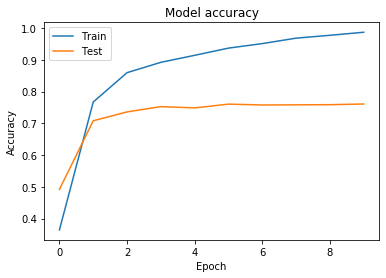

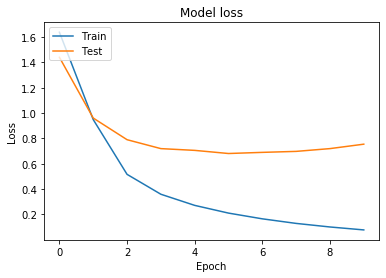

In [15]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# pre-trained word embedding?


In [16]:
# use CNN hidden layer

embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          3727900   
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 66        
Total params: 3,793,384
Trainable params: 3,793,384
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(X_train, newsgroup_train.target,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, newsgroup_test.target),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, newsgroup_train.target, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, newsgroup_test.target, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Train on 3443 samples, validate on 2291 samples
Epoch 1/10
3443/3443 [==============================] - 31s 9ms/sample - loss: 1.2230 - accuracy: 0.5469 - val_loss: 0.8392 - val_accuracy: 0.7062
Epoch 2/10
3443/3443 [==============================] - 30s 9ms/sample - loss: 0.3335 - accuracy: 0.8963 - val_loss: 0.7531 - val_accuracy: 0.7377
Epoch 3/10
3443/3443 [==============================] - 29s 8ms/sample - loss: 0.1271 - accuracy: 0.9640 - val_loss: 0.9172 - val_accuracy: 0.7163
Epoch 4/10
3443/3443 [==============================] - 30s 9ms/sample - loss: 0.0429 - accuracy: 0.9948 - val_loss: 0.9224 - val_accuracy: 0.7399
Epoch 5/10
3443/3443 [==============================] - 29s 9ms/sample - loss: 0.0133 - accuracy: 1.0000 - val_loss: 1.0213 - val_accuracy: 0.7342
Epoch 6/10
3443/3443 [==============================] - 32s 9ms/sample - loss: 0.0053 - accuracy: 1.0000 - val_loss: 1.0831 - val_accuracy: 0.7342
Epoch 7/10
3443/3443 [==============================] - 32s 9ms/sample

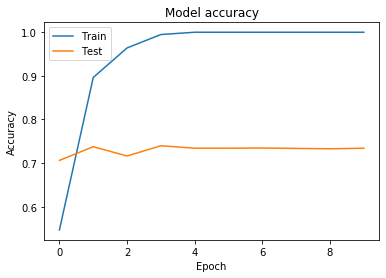

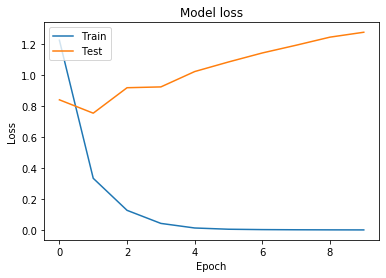

In [18]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()